# Goals of the Case Study
## There are quite a few goals for this case study:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

# Step 1: importing data

In [ ]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [29]:
df = pd.read_csv("Leads.csv")

# Step 2: inspecting the dataframe

In [30]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [13]:
df.shape

(9240, 37)

In [14]:
# let's look at the statistical aspects of the dataframe
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [15]:
# Let's see the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Step 3: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [31]:
# List of binary variables to convert
binary_vars = ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article',
               'X Education Forums', 'Newspaper', 'Digital Advertisement', 
               'Through Recommendations', 'Receive More Updates About Our Courses',
               'Update me on Supply Chain Content', 'Get updates on DM Content',
               'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']

# Conversion from 'Yes'/'No' to numeric 1/0
df[binary_vars] = df[binary_vars].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

# Check the conversion results
df[binary_vars].head()

,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [32]:
# List of categorical variables for one-hot encoding with multiple levels
multi_level_vars = ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization',
                    'How did you hear about X Education', 'What is your current occupation',
                    'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
                    'Lead Profile', 'City', 'Asymmetrique Activity Index', 
                    'Asymmetrique Profile Index', 'Last Notable Activity']

# Creating dummy variables and dropping the first category to avoid multicollinearity
dummy_df = pd.get_dummies(df[multi_level_vars], drop_first=True)

# Adding dummy variables back into the main dataframe
df = pd.concat([df, dummy_df], axis=1)

# Dropping original categorical columns after encoding
df.drop(columns=multi_level_vars, inplace=True)

# Inspecting the transformed dataframe
df.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,False,False,True,False,False,False,False,False,False,False
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,False,False,False,False,False,False,False,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,False,False,True,False,False,False,False,False,False,False
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,False,False,True,False,False,False,False,False,False,False


#### Dropping the repeated variables

In [33]:
# Columns to drop (only if they still exist)
cols_to_drop = ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization',
                'How did you hear about X Education', 'What is your current occupation',
                'What matters most to you in choosing this course', 'Tags', 'Lead Quality',
                'Lead Profile', 'City', 'Asymmetrique Activity Index',
                'Asymmetrique Profile Index', 'Last Notable Activity']

# Drop columns only if they are still present in df
existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]

# Now drop safely
df.drop(columns=existing_cols_to_drop, inplace=True)

# Check resulting shape
df.shape

(9240, 192)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 192 entries, Prospect ID to Last Notable Activity_View in browser link Clicked
dtypes: bool(170), float64(4), int64(17), object(1)
memory usage: 3.0+ MB


In [34]:
df['TotalVisits'] = pd.to_numeric(df['TotalVisits'], errors='coerce')
df['Total Time Spent on Website'] = pd.to_numeric(df['Total Time Spent on Website'], errors='coerce')
df['Page Views Per Visit'] = pd.to_numeric(df['Page Views Per Visit'], errors='coerce')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 192 entries, Prospect ID to Last Notable Activity_View in browser link Clicked
dtypes: bool(170), float64(4), int64(17), object(1)
memory usage: 3.0+ MB


#### Checking for Outliers

In [35]:
# Checking outliers carefully in recommended numeric variables
numeric_vars = ['TotalVisits', 
                'Total Time Spent on Website', 
                'Page Views Per Visit',
                'Asymmetrique Activity Score', 
                'Asymmetrique Profile Score']

# Descriptive statistics at specific percentiles for identifying outliers
df[numeric_vars].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,3.445238,487.698268,2.362820,14.306252,16.344883
std,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,7.000000,11.000000
25%,1.000000,12.000000,1.000000,14.000000,15.000000
50%,3.000000,248.000000,2.000000,14.000000,16.000000
75%,5.000000,936.000000,3.000000,15.000000,18.000000
90%,7.000000,1380.000000,5.000000,16.000000,19.000000
95%,10.000000,1562.000000,6.000000,17.000000,20.000000
99%,17.000000,1840.610000,9.000000,17.000000,20.000000


- TotalVisits (99th percentile is 17 but max is 251)
- Page Views Per Visit (99th percentile is 9, but max is 55)

These variables have a significant difference between the 99th percentile and the maximum value, indicating strong outliers.

In [36]:
# Defining variables with outliers to cap
outlier_vars = ['TotalVisits', 'Page Views Per Visit']

# Cap the values at the 99th percentile to handle outliers
for var in outlier_vars:
    upper_limit = df[var].quantile(0.99)
    df[var] = np.where(df[var] > upper_limit, upper_limit, df[var])

# Confirming outliers have been handled
df[outlier_vars].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.332747,2.334002
std,3.252420,1.985712
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
90%,7.000000,5.000000
95%,10.000000,6.000000
99%,17.000000,9.000000


#### Checking for Missing Values and Inputing Them

In [37]:
# Calculating the percentage of missing values clearly
missing_percent = df.isnull().mean() * 100
missing_columns = missing_percent[missing_percent > 0].sort_values(ascending=False)

# Clearly present missing values in a DataFrame
missing_df = pd.DataFrame({'Column Name': missing_columns.index, 
                           'Missing %': missing_columns.values})

# Displaying clearly
missing_df

,Column Name,Missing %
0,Asymmetrique Activity Score,45.649351
1,Asymmetrique Profile Score,45.649351
2,TotalVisits,1.482684
3,Page Views Per Visit,1.482684


I will drop columns with >40% missing values:
- Asymmetrique Activity Score
- Asymmetrique Profile Score
- Impute columns with <5% missing values using median:
    - TotalVisits
    - Page Views Per Visit

In [38]:
# Imputing missing values using median (clearly avoiding warnings)
df['TotalVisits'] = df['TotalVisits'].fillna(df['TotalVisits'].median())
df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median())

# Verify if missing values are resolved
df.isnull().sum().sum()

8436

In [39]:
# Checking percentage of missing values clearly after handling
missing_after_treatment = (df.isnull().mean() * 100).sort_values(ascending=False)

# Display only columns with remaining missing values (if any)
missing_after_treatment[missing_after_treatment > 0]

Asymmetrique Profile Score     45.649351
Asymmetrique Activity Score    45.649351
dtype: float64

In [40]:
# Clearly dropping columns with very high missing values
df.drop(columns=['Asymmetrique Activity Score', 'Asymmetrique Profile Score'], inplace=True)

# Verify clearly again to ensure they are dropped
df.isnull().mean().sort_values(ascending=False).head()

Prospect ID                                                 0.0
What matters most to you in choosing a course_Other         0.0
How did you hear about X Education_Social Media             0.0
How did you hear about X Education_Student of SomeSchool    0.0
How did you hear about X Education_Word Of Mouth            0.0
dtype: float64

The output now clearly indicates 0% missing values, meaning the dataset has been successfully cleaned and no longer contains missing values.

### Step 4: Test-Train Split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:

# Putting feature variables into X (drop 'Converted' - target variable, and 'Prospect ID' - identifier)
X = df.drop(['Converted', 'Prospect ID'], axis=1)

In [44]:
X.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,660727,0,0,2.0,1532,2.0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,660719,0,0,1.0,305,1.0,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
4,660681,0,0,2.0,1428,1.0,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False


In [45]:
# Putting target variable ('Converted') into y
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [46]:
# Splitting the data into train and test datasets clearly
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7, 
                                                    test_size=0.3, 
                                                    random_state=100,
                                                    stratify=y)

In [47]:
# Verify dimensions clearly after splitting
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

Training set shape: (6468, 188)
Test set shape: (2772, 188)


### Step 5: Feature Scaling

In [48]:
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Scaling numeric features clearly
numeric_features = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Fit and transform the training dataset
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])

# Transform (not fit_transform!) the test dataset using the same scaler
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Check the first few rows after scaling
X_train.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7356,593016,0,0,-1.021951,-0.879151,-1.173500,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3109,630042,0,0,0.526054,-0.875497,0.101695,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
3845,623207,0,0,-0.093148,-0.698274,0.356734,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
1020,649316,0,0,0.526054,0.701241,-0.321670,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
2903,631782,0,0,-0.712350,-0.765875,-0.663422,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False


In [49]:
conversion_rate = (sum(df['Converted']) / len(df['Converted'].index)) * 100
conversion_rate

38.53896103896104

Feature scaling was successfully applied to numeric features:
- TotalVisits
- Total Time Spent on Website
- Page Views Per Visit

Conversion rate is calculated clearly as ~38.54%.

### Step 6: Looking at Correlations

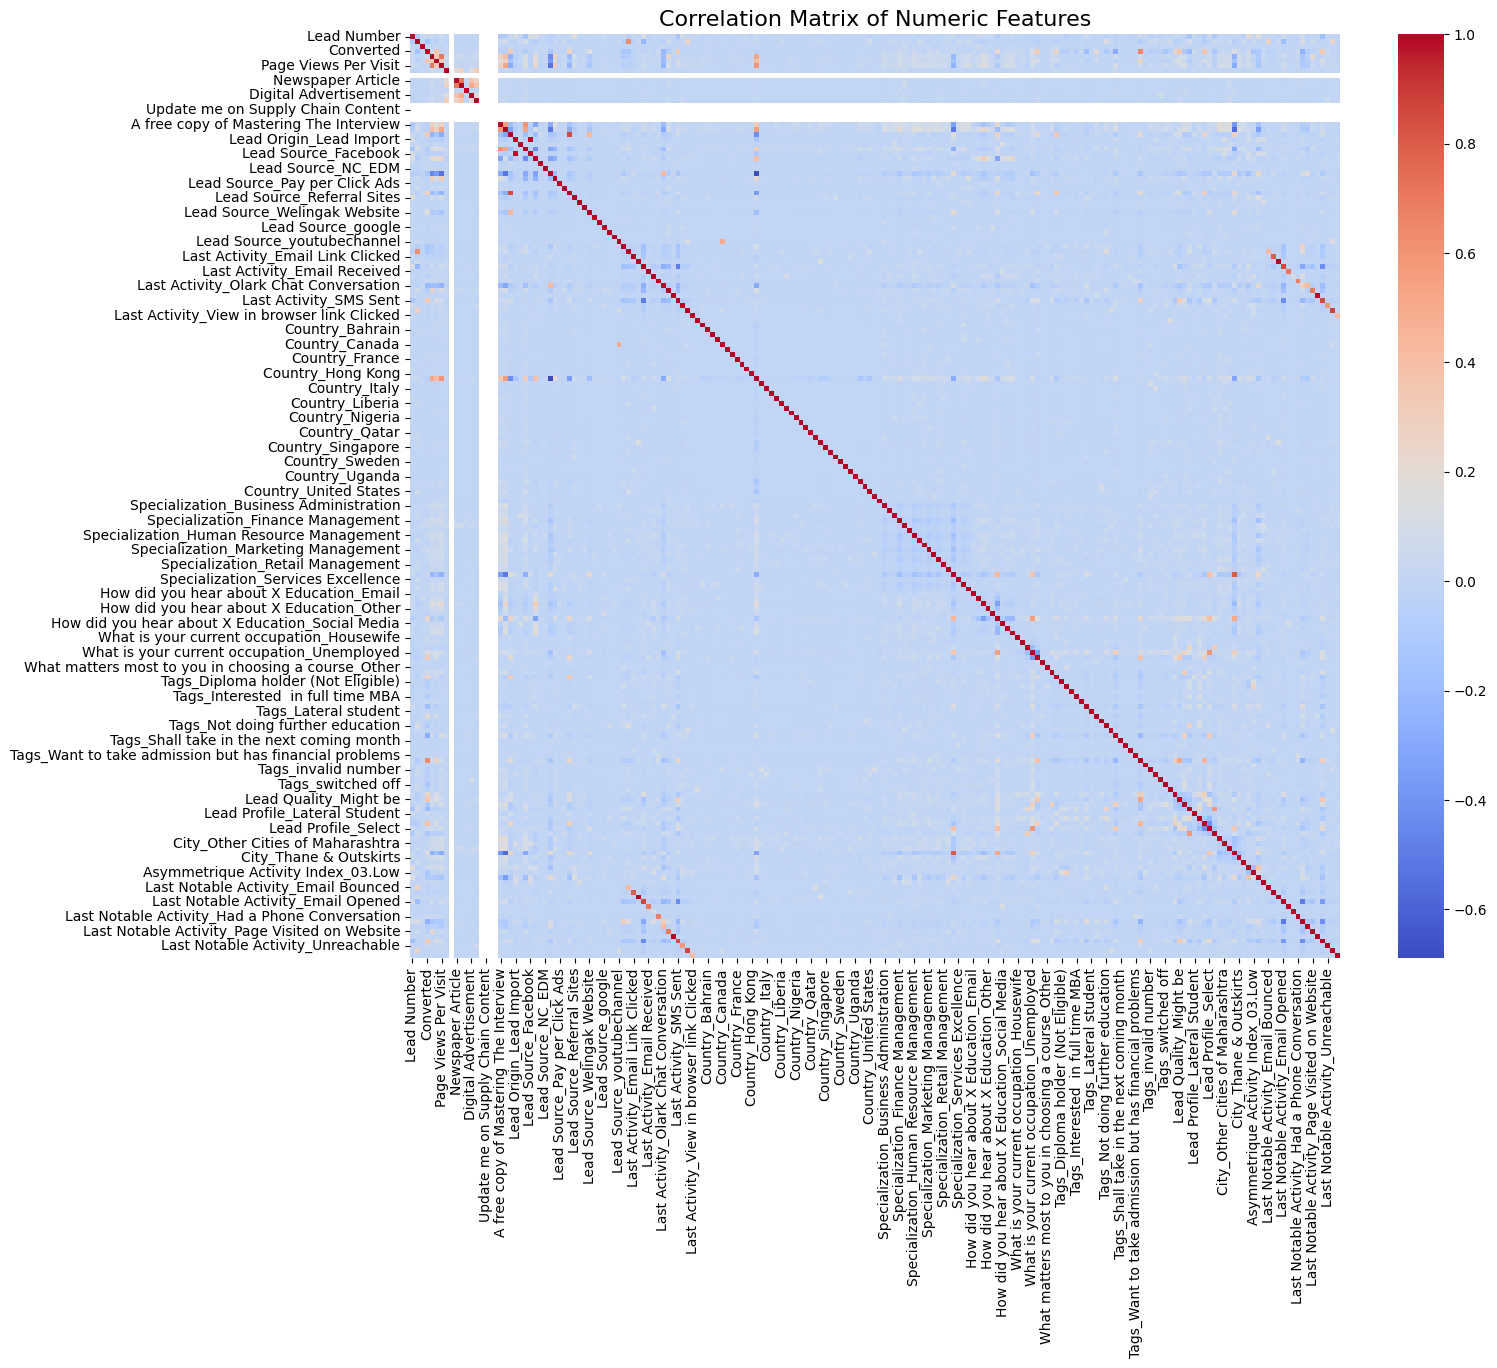

In [53]:
# Importing necessary visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Drop any remaining non-numeric columns clearly (e.g., Prospect ID)
df_numeric = df.select_dtypes(include=['float64', 'int64', 'bool'])

# Set figure size clearly
plt.figure(figsize=(15, 12))

# Plot the correlation heatmap clearly using only numeric features
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=False)

# Clearly show plot
plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.show()

#### Dropping highly correlated dummy variables

### Explicitly check for highly correlated dummy variables

In [54]:
# Calculate correlation clearly
corr_matrix = X_train.corr().abs()

# Select highly correlated features clearly (correlation > 0.75 threshold)
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify clearly variables with correlation > 0.75
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.75)]

high_corr_features

['X Education Forums',
 'Lead Source_Facebook',
 'Lead Source_Reference',
 'City_Select',
 'Last Notable Activity_Email Link Clicked',
 'Last Notable Activity_Email Marked Spam',
 'Last Notable Activity_Email Opened',
 'Last Notable Activity_Resubscribed to emails',
 'Last Notable Activity_SMS Sent',
 'Last Notable Activity_Unsubscribed']

In [55]:
# Dropping assuming high_corr_features obtained from above
X_train.drop(columns=high_corr_features, inplace=True)
X_test.drop(columns=high_corr_features, inplace=True)

# Verify shapes after dropping
X_train.shape, X_test.shape

((6468, 178), (2772, 178))

#### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

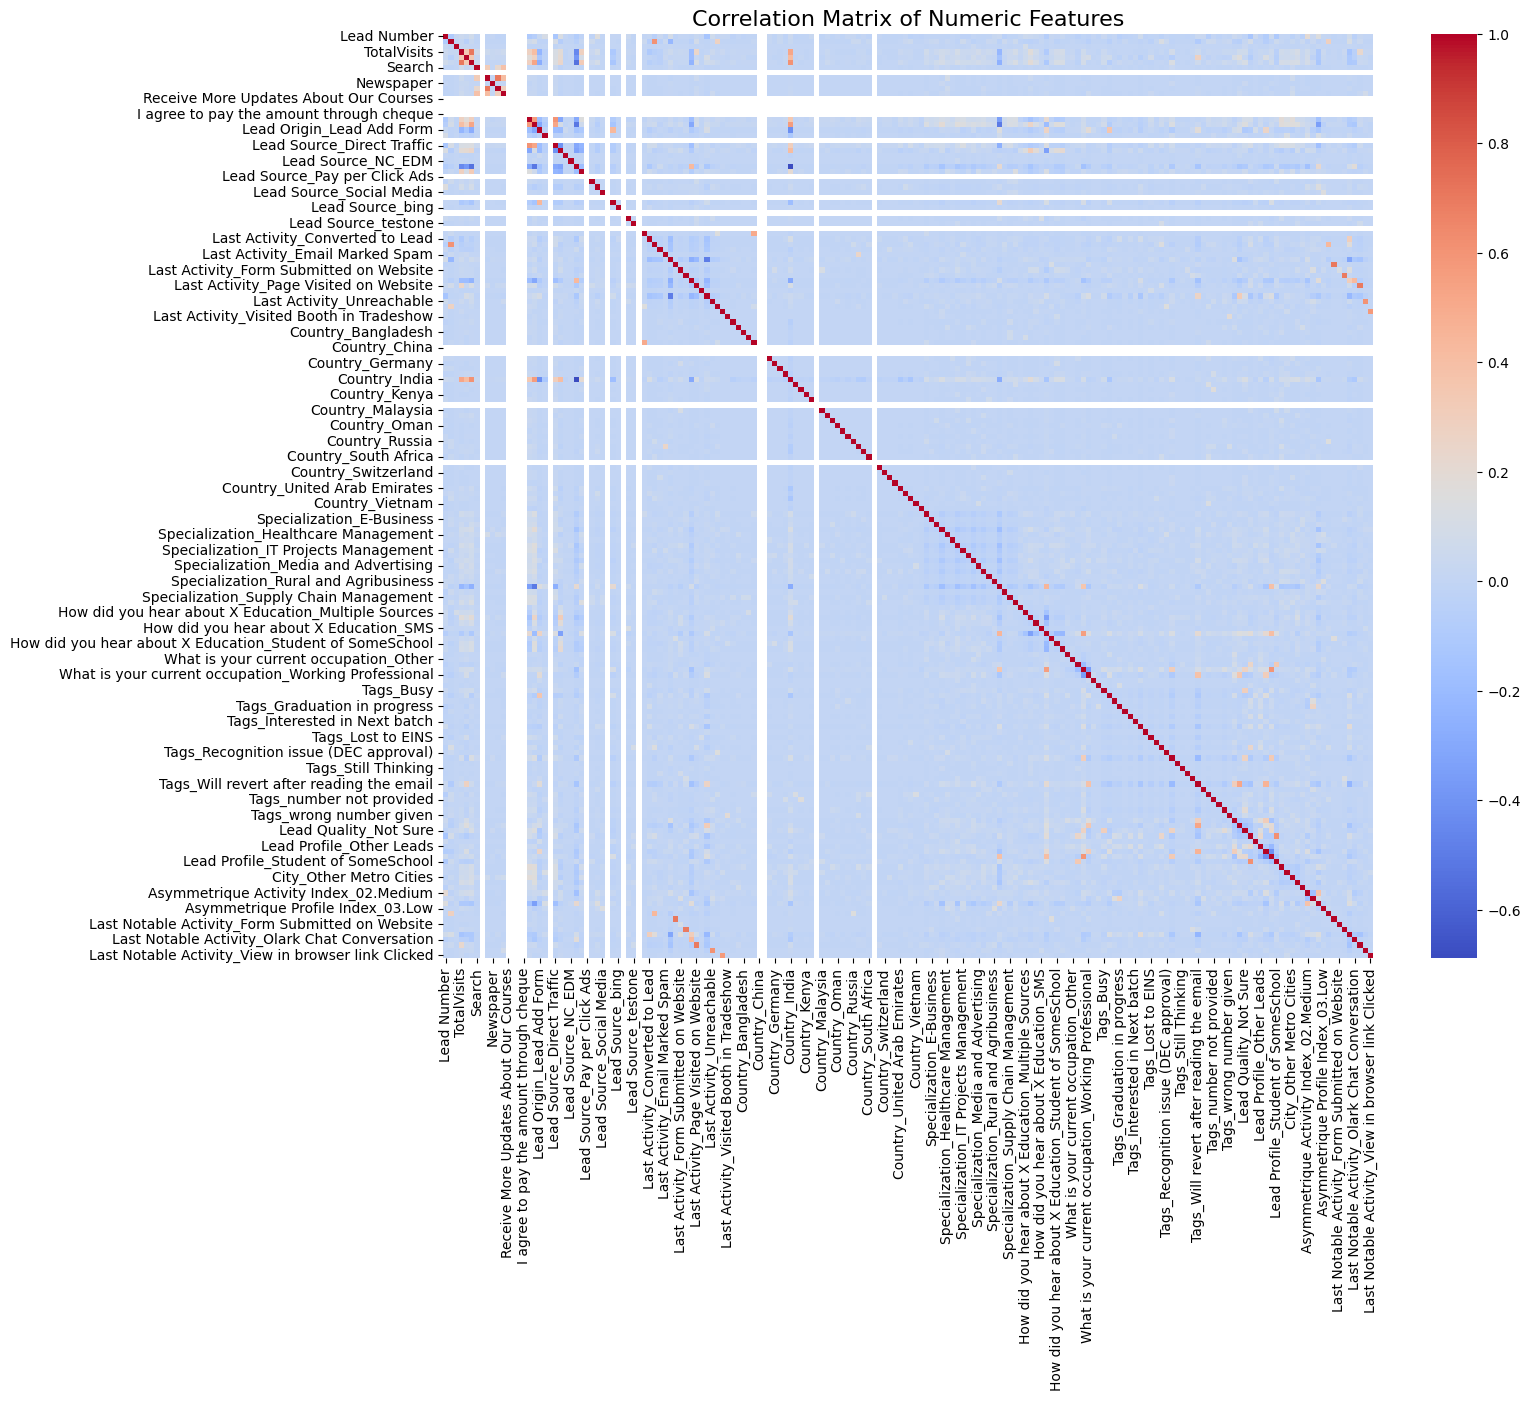

In [57]:
# Set figure size clearly
plt.figure(figsize=(15, 12))

# Plot the correlation heatmap clearly using only numeric features
sns.heatmap(X_train.corr(), cmap='coolwarm', annot=False)

# Clearly show plot
plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.show()

### Try to identify highly correlated variables again using code

In [58]:
# Calculate correlation matrix clearly
corr_matrix = X_train.corr().abs()

# Extract upper triangle clearly
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Clearly find columns with high correlation (>0.75)
highly_correlated_features = [column for column in upper.columns if any(upper[column] > 0.75)]

# Display highly correlated features clearly
highly_correlated_features

[]

### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running the First Training Model

In [59]:
import statsmodels.api as sm

In [61]:
# Ensuring X_train is numeric explicitly
X_train = X_train.apply(pd.to_numeric, errors='coerce')

# Check and confirm
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6468 entries, 7356 to 8790
Columns: 178 entries, Lead Number to Last Notable Activity_View in browser link Clicked
dtypes: bool(161), float64(3), int64(14)
memory usage: 1.9 MB


In [62]:
# Clearly convert boolean columns explicitly to numeric (0 or 1)
bool_cols = X_train.select_dtypes(include=['bool']).columns
X_train[bool_cols] = X_train[bool_cols].astype(int)
X_test[bool_cols] = X_test[bool_cols].astype(int)

# Verify conversion clearly
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6468 entries, 7356 to 8790
Columns: 178 entries, Lead Number to Last Notable Activity_View in browser link Clicked
dtypes: float64(3), int64(175)
memory usage: 8.8 MB


In [63]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                          164
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1015.8
Date:                Sun, 16 Mar 2025   Deviance:                       2031.7
Time:                        10:46:43   Pearson chi2:                 1.34e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6391
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -3.4076      2.808     -1.214      0.225      -8.910       2.095
Lead Number                                                                5.5e-06   2.87e-06      1.915      0.055   -1.29e-07    1.11e-05
Do Not Email                                                               -0.8836      0.367     -2.410      0.016      -1.602      -0.165
Do Not Call                                                                21.5301   1.75e+05      0.000      1.000   -3.43e+05    3.43e+05
TotalVisits                                                                 0.2406      0.094      2.553      0.011       0.056       0.425
Total Time Spent on Website                                                 1.1112      0.071     15.558      0.000       0.971       1.251
Page Views Per Visit                                                       -0.1981      0.104     -1.898      0.058      -0.403       0.007
Search                                                                     -1.5747      2.428     -0.648      0.517      -6.334       3.185
Magazine                                                                 2.849e-08      0.001   2.28e-05      1.000      -0.002       0.002
Newspaper Article                                                         -45.9826   3.05e+05     -0.000      1.000   -5.99e+05    5.99e+05
Newspaper                                                                 -21.8268   1.67e+05     -0.000      1.000   -3.28e+05    3.28e+05
Digital Advertisement                                                      22.3058   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Through Recommendations                                                     2.5829     13.478      0.192      0.848     -23.833      28.999
Receive More Updates About Our Courses                                  -3.952e-08      0.002  -1.81e-05      1.000      -0.004       0.004
Update me on Supply Chain Content                                       -2.005e-08      0.001  -2.08e-05      1.000      -0.002       0.002
Get updates on DM Content                                               -8.876e-08      0.001  -8.11e-05      1.000      -0.002       0.002
I agree to pay the amount through cheque                                  6.76e-10      0.001   4.62e-07      1.000      -0.003       0.003
A free copy of Mastering The Interview                                     -0.0419      0.249     -0.168      0.866      -0.530       0.446
Lead Origin_Landing Page Submission                                         0.0021      0.297      0.007      0.994      -0.580       0.584
Lea

### Observations:
- **No. of Observations:** 6468  
- **No. of Features:** 164 *(quite high, suggesting further feature selection is recommended)*  
- **Pseudo R-squared:** 0.6391 *(Good explanatory power)*  

### Statistically Significant Variables (p-value < 0.05):

**Key positive variables (higher conversion chance):**
- **Total Time Spent on Website:** Strongly positive impact.
- **Lead Source:** Welingak Website
- **Last Activity:** SMS Sent
- **Occupation:** Student, Unemployed, Working Professional
- **Tags:**  
  - Closed by Horizzon  
  - Lost to EINS  
  - Will revert after reading the email  
- *Several other tags clearly indicating higher likelihood of conversion.*

**Key negative variables (lower conversion chance):**
- **Do Not Email:** clear negative impact.
- **Country:** India, Saudi Arabia
- **Tags:**  
  - Diploma holder (Not Eligible)  
  - Interested in full time MBA  
  - Not doing further education  
  - opp hangup  
  - switched off  
- **Lead Quality:** Worst
- **Asymmetrique Activity Index:** 03.Low
- **Last Notable Activity:** Modified, Olark Chat Conversation

### Step 8: Feature Selection Using RFE

In [64]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

Ensure all numeric columns were scaled properly before running RFE:

In [67]:
numeric_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In [72]:
from sklearn.feature_selection import RFE
# Logistic Regression with increased max_iter and liblinear solver clearly
logreg = LogisticRegression(max_iter=1000)

# running RFE clearly with fewer variables as output (start small, increase if necessary)
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe.fit(X_train, y_train)

# Clearly verify selected features
selected_features = X_train.columns[rfe.support_]
print("Selected features:", selected_features)

/Users/khanhmai/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/khanhmai/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

Selected features: Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low'],
      dtype='object')


In [73]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,

In [74]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', False, 150),
 ('Do Not Email', False, 11),
 ('Do Not Call', False, 122),
 ('TotalVisits', False, 69),
 ('Total Time Spent on Website', False, 10),
 ('Page Views Per Visit', False, 68),
 ('Search', False, 67),
 ('Magazine', False, 154),
 ('Newspaper Article', False, 111),
 ('Newspaper', False, 119),
 ('Digital Advertisement', False, 133),
 ('Through Recommendations', False, 128),
 ('Receive More Updates About Our Courses', False, 153),
 ('Update me on Supply Chain Content', False, 152),
 ('Get updates on DM Content', False, 151),
 ('I agree to pay the amount through cheque', False, 155),
 ('A free copy of Mastering The Interview', False, 115),
 ('Lead Origin_Landing Page Submission', False, 131),
 ('Lead Origin_Lead Add Form', False, 8),
 ('Lead Origin_Lead Import', False, 48),
 ('Lead Origin_Quick Add Form', False, 164),
 ('Lead Source_Direct Traffic', False, 62),
 ('Lead Source_Google', False, 74),
 ('Lead Source_Live Chat', False, 144),
 ('Lead Source_NC_EDM', False,

In [75]:
col = X_train.columns[rfe.support_]

In [76]:
X_train.columns[~rfe.support_]

Index(['Lead Number', 'Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'Newspaper',
       ...
       'Asymmetrique Profile Index_03.Low',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=163)

In [77]:
# Dropping clearly the unselected features
X_train_rfe = X_train[col]  # col = X_train.columns[rfe.support_]
X_test_rfe = X_test[col]

# Verify clearly
print(X_train_rfe.shape)
print(X_test_rfe.shape)

(6468, 15)
(2772, 15)


In [80]:
X_train_rfe.head()

,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_number not provided,Tags_switched off,Tags_wrong number given,Lead Quality_Worst,Asymmetrique Activity Index_03.Low
7356,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3109,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3845,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1020,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2903,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


##### Assessing the model with StatsModels

In [181]:
import statsmodels.api as sm

# Add constant to the selected features clearly
X_train_sm = sm.add_constant(X_train_rfe)

# Fit logistic regression model
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

# Fit the model clearly
res = logm2.fit()

# Print model summary clearly
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1533.8
Date:                Mon, 17 Mar 2025   Deviance:                       3067.6
Time:                        16:57:37   Pearson chi2:                 7.91e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5764
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.8754      0.066    -28.609      0.000      -2.004      -1.747
Lead Source_Welingak Website                 5.4012      1.014      5.327      0.000       3.414       7.389
Last Activity_SMS Sent                       2.0979      0.100     21.071      0.000       1.903       2.293
Tags_Closed by Horizzon                      6.5249      0.713      9.146      0.000       5.127       7.923
Tags_Interested  in full time MBA           -1.2445      0.611     -2.036      0.042      -2.442      -0.046
Tags_Interested in other courses            -2.0553      0.392     -5.245      0.000      -2.823      -1.287
Tags_Lost to EINS                            7.3053      0.951      7.678      0.000       5.441       9.170
Tags_Not doing further education            -2.1964      1.030     -2.132      0.033      -4.215      -0.178
Tags_Ringing                                -3.0061      0.238    -12.625      0.000      -3.473      -2.539
Tags_Will revert after reading the email     4.8920      0.173     28.215      0.000       4.552       5.232
Tags_invalid number                        -23.2750   1.47e+04     -0.002      0.999   -2.88e+04    2.88e+04
Tags_number not provided                   -23.6156   2.75e+04     -0.001      0.999   -5.39e+04    5.39e+04
Tags_switched off                           -3.4068      0.591     -5.762      0.000      -4.566      -2.248
Tags_wrong number given                    -23.6311   2.26e+04     -0.001      0.999   -4.43e+04    4.43e+04
Lead Quality_Worst                          -3.8367      0.791     -4.852      0.000      -5.387      -2.287
Asymmetrique Activity Index_03.Low          -2.2015      0.414     -5.315      0.000      -3.013      -1.390
============================================================================================================
"""

In [82]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7356    0.953317
3109    0.007528
3845    0.994027
1020    0.953317
2903    0.007528
4138    0.007528
4396    0.003295
5834    0.132913
6197    0.953317
7001    0.132913
dtype: float64

In [83]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.95331737, 0.00752841, 0.99402705, 0.95331737, 0.00752841,
       0.00752841, 0.00329466, 0.13291329, 0.95331737, 0.13291329])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [84]:
# Clearly create a DataFrame with Actual Converted flag and Predicted probabilities
y_train_pred_final = pd.DataFrame({
    'Converted': y_train.values,
    'Converted_Prob': y_train_pred
})

# Clearly add index for reference (assuming the original index from X_train is meaningful, otherwise skip this)
y_train_pred_final['Lead_ID'] = y_train.index

# Clearly display first 5 rows
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_ID
0,1,0.953317,7356
1,0,0.007528,3109
2,1,0.994027,3845
3,1,0.953317,1020
4,0,0.007528,2903


In [85]:
# Adding a new column 'predicted' clearly based on a threshold of 0.5
y_train_pred_final['predicted'] = y_train_pred_final['Converted_Prob'].apply(lambda x: 1 if x > 0.5 else 0)

# Display clearly the first few rows
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_ID,predicted
0,1,0.953317,7356,1
1,0,0.007528,3109,0
2,1,0.994027,3845,1
3,1,0.953317,1020,1
4,0,0.007528,2903,0


In [86]:
from sklearn import metrics

In [88]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3663  312]
 [ 289 2204]]


In [89]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9070810142238713


#### Checking VIFs

In [90]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe[col].values, i) for i in range(X_train_rfe[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Last Activity_SMS Sent,1.40
8,Tags_Will revert after reading the email,1.28
13,Lead Quality_Worst,1.14
6,Tags_Not doing further education,1.08
7,Tags_Ringing,1.08
4,Tags_Interested in other courses,1.04
0,Lead Source_Welingak Website,1.03
14,Asymmetrique Activity Index_03.Low,1.03
3,Tags_Interested in full time MBA,1.02
9,Tags_invalid number,1.02


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [92]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3663,  312],
       [ 289, 2204]])

| Actual \ Predicted | Not Converted | Converted |
|---------------------|---------------|-----------|
| **Not Converted**   | 3663          | 312      |
| **Converted**       | 289           | 2204     |

In [93]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9070810142238713

## Metrics beyond simply accuracy

In [94]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [95]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8840754111512235

In [96]:
# Let us calculate specificity
TN / float(TN+FP)

0.9215094339622641

In [97]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.07849056603773585


In [98]:
# positive predictive value 
print (TP / float(TP+FP))

0.875993640699523


In [99]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9268724696356275


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [101]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [102]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

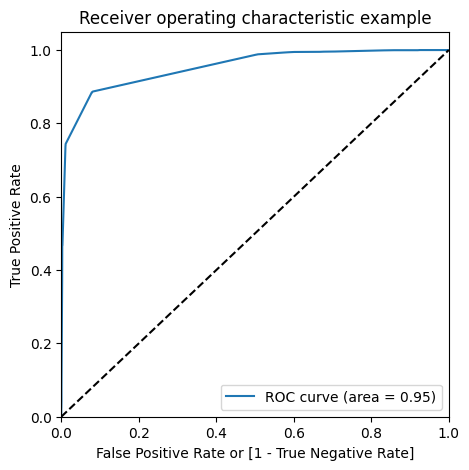

In [103]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## ROC Curve Interpretation:

- **AUC = 0.95**:  
  - Indicates a **very strong** predictive model.
  - A value close to 1 (in this case, 0.95) signifies that the model has high discriminative ability in distinguishing between converted and non-converted leads.

### Insights clearly:
- **AUC = 0.95:** The logistic regression model demonstrates excellent predictive performance.
- The curve is closer to the top-left corner, which means the model effectively minimizes false positives while maximizing true positives.


## With such a strong ROC performance, this model is reliable and robust enough to be used for predictions.

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [104]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.953317,7356,1,1,1,1,1,1,1,1,1,1,1
1,0,0.007528,3109,0,1,0,0,0,0,0,0,0,0,0
2,1,0.994027,3845,1,1,1,1,1,1,1,1,1,1,1
3,1,0.953317,1020,1,1,1,1,1,1,1,1,1,1,1
4,0,0.007528,2903,0,1,0,0,0,0,0,0,0,0,0


In [105]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385436  1.000000  0.000000
0.1   0.1  0.683828  0.988367  0.492830
0.2   0.2  0.906926  0.884878  0.920755
0.3   0.3  0.907081  0.884477  0.921258
0.4   0.4  0.907081  0.884075  0.921509
0.5   0.5  0.907081  0.884075  0.921509
0.6   0.6  0.894403  0.744083  0.988679
0.7   0.7  0.893321  0.740874  0.988931
0.8   0.8  0.893321  0.740874  0.988931
0.9   0.9  0.892703  0.739270  0.988931


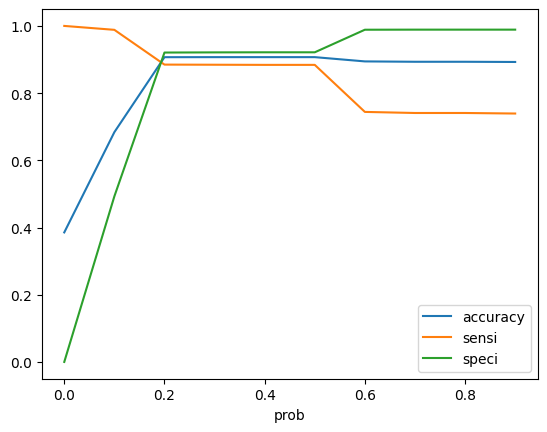

In [106]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Looking at the graph, the intersection between sensitivity and specificity curves seems to happen approximately around 0.25 probability.

In [182]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.953317,7356,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.007528,3109,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.994027,3845,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.953317,1020,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.007528,2903,0,1,0,0,0,0,0,0,0,0,0,0


In [183]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9069264069264069

In [184]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3660,  315],
       [ 287, 2206]])

In [185]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [186]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8848776574408344

In [187]:
# Let us calculate specificity
TN / float(TN+FP)

0.9207547169811321

In [188]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.07924528301886792


In [189]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8750495834986116


In [190]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9272865467443628


## Precision and Recall

Looking at the confusion matrix again

In [191]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3663,  312],
       [ 289, 2204]])

##### Precision
TP / TP + FP

In [192]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.875993640699523

##### Recall
TP / TP + FN

In [193]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8840754111512235

Using sklearn utilities for the same

In [194]:
from sklearn.metrics import precision_score, recall_score

In [195]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.875993640699523

In [196]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8840754111512235

### Precision and recall tradeoff

In [197]:
from sklearn.metrics import precision_recall_curve

In [198]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       1
 3       1
 4       0
        ..
 6463    0
 6464    0
 6465    1
 6466    1
 6467    1
 Name: Converted, Length: 6468, dtype: int64,
 0       1
 1       0
 2       1
 3       1
 4       0
        ..
 6463    0
 6464    0
 6465    0
 6466    1
 6467    1
 Name: predicted, Length: 6468, dtype: int64)

In [199]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

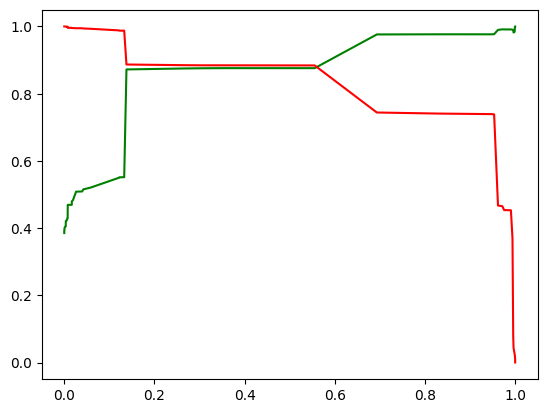

In [200]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [201]:
# Select only the columns that were previously selected by RFE
X_test_sm = X_test_rfe[col]

# Add constant to the test set (for StatsModels)
X_test_sm = sm.add_constant(X_test_sm)

# Predict on the test data using the trained model
y_test_pred = res.predict(X_test_sm)

# Check the first 10 predictions
y_test_pred[:10]

1266    0.019252
907     0.132913
6182    0.953317
2973    0.132913
8469    0.132913
6299    0.555398
1220    0.132913
7957    0.000367
5971    0.132913
6157    0.953317
dtype: float64

In [202]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [203]:
# Let's see the head
y_pred_1.head()

,0
1266,0.019252
907,0.132913
6182,0.953317
2973,0.132913
8469,0.132913


In [204]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [205]:
# Putting CustID to index
y_test_df['Lead_ID'] = y_test_df.index

In [206]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [207]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [208]:
y_pred_final.head()

,Converted,Lead_ID,0
0,0,1266,0.019252
1,1,907,0.132913
2,1,6182,0.953317
3,0,2973,0.132913
4,0,8469,0.132913


In [209]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [210]:
# Rearranging the columns using the correct syntax
y_pred_final = y_pred_final.reindex(columns=['Lead_ID', 'Converted', 'Converted_Prob'])
y_pred_final.head()

,Lead_ID,Converted,Converted_Prob
0,1266,0,0.019252
1,907,1,0.132913
2,6182,1,0.953317
3,2973,0,0.132913
4,8469,0,0.132913


In [211]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.33 else 0)

In [212]:
y_pred_final.head()

,Lead_ID,Converted,Converted_Prob,final_predicted
0,1266,0,0.019252,0
1,907,1,0.132913,0
2,6182,1,0.953317,1
3,2973,0,0.132913,0
4,8469,0,0.132913,0


In [215]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9044011544011544

In [216]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1564,  140],
       [ 125,  943]])

In [217]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [218]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8829588014981273

In [219]:
# Let us calculate specificity
TN / float(TN+FP)

0.9178403755868545